Train

In [7]:
!python ../../dump_dataset.py -o 5000 -c 100 -j 7

Set random seed to 7
{'PROCESSOR_NUM': 24, 'CLAUSE_NUM': 400, 'VARIABLE_NUM': 100, 'MIN_VARIABLE_NUM': 1, 'BATCH_SIZE': 1, 'CLAUSE_SIZE': 400, 'MIN_CLAUSE_NUM': 1, 'SR_GENERATOR': False}
100%|███████████████████████████████████████| 5000/5000 [15:49<00:00,  5.26it/s]


Test

In [8]:
!python ../../dump_dataset.py -o 1000 -c 100 -j 8

Set random seed to 8
{'PROCESSOR_NUM': 24, 'CLAUSE_NUM': 400, 'VARIABLE_NUM': 100, 'MIN_VARIABLE_NUM': 1, 'BATCH_SIZE': 1, 'CLAUSE_SIZE': 400, 'MIN_CLAUSE_NUM': 1, 'SR_GENERATOR': False}
100%|███████████████████████████████████████| 1000/1000 [03:07<00:00,  5.33it/s]


In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_30/train_1_sr_30.tfrecord \
    --test_file=sr_30/test_2_sr_30.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_30 \
    --export_dir=export_sr_30 \
    --variable_number=30 \
    --clause_number=120 \
    --train_files_gzipped=False \
    --batch_size=64 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_50/train_3_sr_50.tfrecord \
    --test_file=sr_50/test_4_sr_50.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_50 \
    --export_dir=export_sr_50 \
    --variable_number=50 \
    --clause_number=200 \
    --train_files_gzipped=False \
    --batch_size=32 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_70/train_5_sr_70.tfrecord \
    --test_file=sr_70/test_6_sr_70.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_70 \
    --export_dir=export_sr_70 \
    --variable_number=70 \
    --clause_number=280 \
    --train_files_gzipped=False \
    --batch_size=32 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_100/train_7_sr_100.tfrecord \
    --test_file=sr_100/test_8_sr_100.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_100 \
    --export_dir=export_sr_100 \
    --variable_number=100 \
    --clause_number=400 \
    --train_files_gzipped=False \
    --batch_size=16 \
    --export_model \
    --attention=True

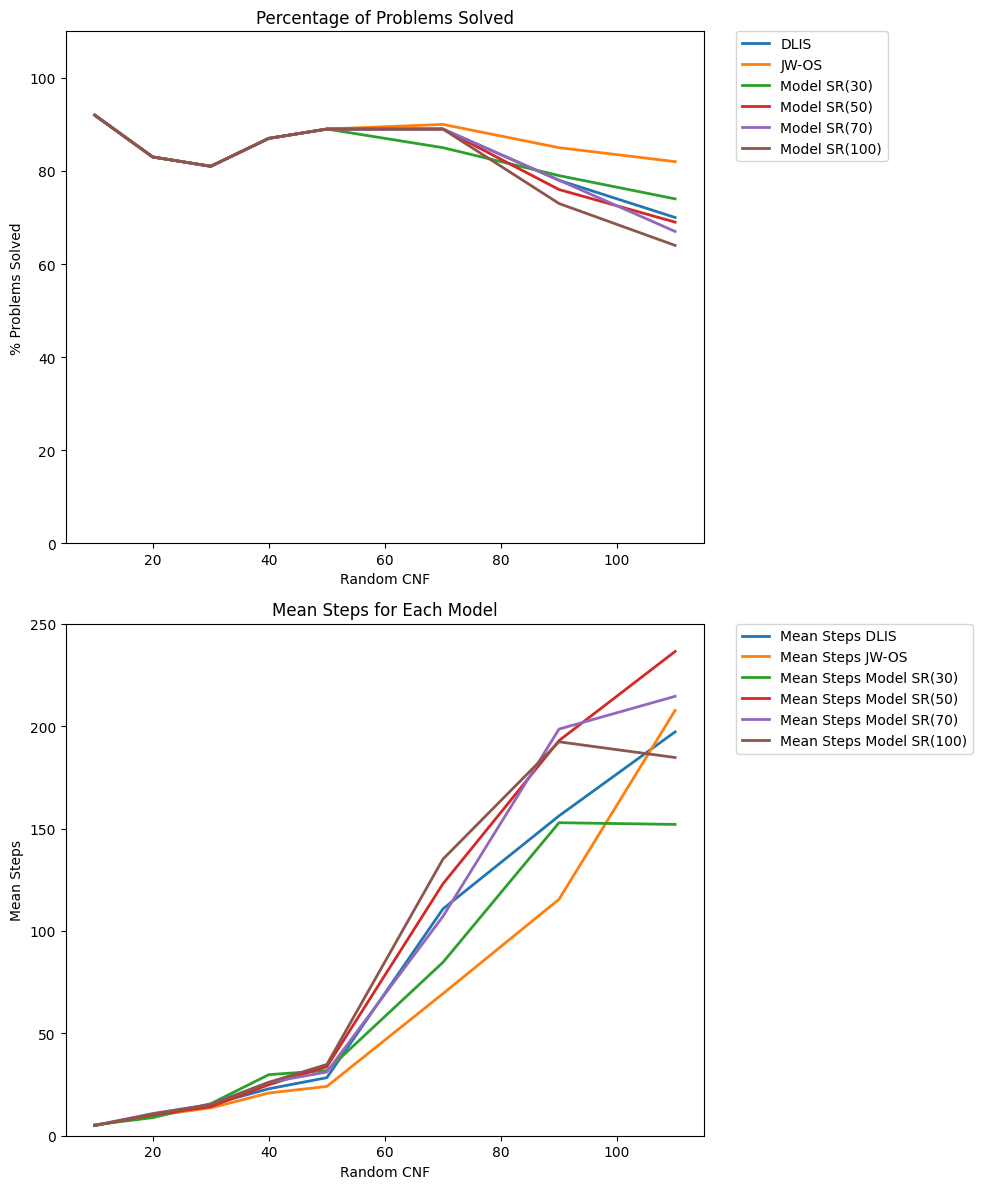

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SR = [10, 20, 30, 40, 50, 70, 90, 110]

# Datos para % de problemas resueltos
data = {
    'DLIS': [92, 83, 81, 87, 89, 89, 78, 70],
    'JW-OS': [92, 83, 81, 87, 89, 90, 85, 82],
    'Model SR(30)': [92, 83, 81, 87, 89, 85, 79, 74],
    'Model SR(50)': [92, 83, 81, 87, 89, 89, 76, 69],
    'Model SR(70)': [92, 83, 81, 87, 89, 89, 78, 67],
    'Model SR(100)': [92, 83, 81, 87, 89, 89, 73, 64]
}

# Crear DataFrame
df = pd.DataFrame(data)

mean = [
    [5.01, 10.01, 15.23, 22.92, 28.35, 110.75, 156.21, 197.24],  # DLIS
    [5.21, 9.76, 13.6, 20.87, 24.07, 69.38, 115.46, 207.72],  # JW-OS
    [5.32, 8.83, 15.64, 29.83, 31.8, 84.67, 152.87, 152.04],  # Model SR(30)
    [5.02, 10.22, 14.20, 24.9, 33.73, 123.01, 192.97, 236.51],  # Model SR(50)
    [5.07, 10.84, 15.32, 26.06, 31.12,107.11, 198.59, 214.60],  # Model SR(70)
    [4.93, 10.60,15.2, 26.08, 34.81, 135.06, 192.38, 184.71]  # Model SR(100)
]

# Agregar columnas de media al DataFrame
for i, column in enumerate(df.columns):
    df[f'Mean Steps {column}'] = mean[i]

# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))


# Graficar líneas en ax1 para % Problems Solved
for i, column in enumerate(df.columns[:6]):  # Las primeras 6 son modelos
    ax1.plot(SR, df[column], linewidth=2, label=column)

# Configuración de ax1
ax1.set_xlabel('Random CNF')
ax1.set_ylabel('% Problems Solved')
ax1.set_ylim(0, 110)
ax1.set_title('Percentage of Problems Solved')
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Graficar líneas en ax2 para Mean Steps
for i, column in enumerate(df.columns[:6]):  # Las primeras 6 son modelos
    ax2.plot(SR, df[f'Mean Steps {column}'], linewidth=2, label=f'Mean Steps {column}')

# Configuración de ax2
ax2.set_xlabel('Random CNF')
ax2.set_ylabel('Mean Steps')
ax2.set_ylim(0, 250)
ax2.set_title('Mean Steps for Each Model')
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
